In [56]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris,make_moons
from sklearn.tree import DecisionTreeClassifier,export_graphviz,DecisionTreeRegressor
import graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from scipy import stats

## Importing data and visualizing 

In [2]:
iris = load_iris()
X = iris.data[:,2:] # Petal length and width
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

## Visualization

# 🌳 export_graphviz()

Used to export a trained Decision Tree into a `.dot` file 
that can be visualized with Graphviz (or converted to a PNG).

## Example
```python
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,                     # your trained DecisionTreeClassifier or Regressor
    out_file="iris_tree.dot",     # where to save the .dot file
    feature_names=iris.feature_names[:2],  # names of input features
    class_names=iris.target_names,         # optional: class labels for output
    rounded=True,                 # rounded node boxes
    filled=True,                  # color nodes by class probability
)

In [4]:
# I will create a dot file of the tree created and transform
export_graphviz(
    tree_clf,
    out_file = 'iris_tree.dot',
    feature_names= iris.feature_names[:2],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)


In [5]:
with open('iris_tree.dot') as f:
    dot_graph = f.read()
    
graph = graphviz.Source(dot_graph)
graph.format = 'png'
graph.render ('iris_tree')

'iris_tree.png'

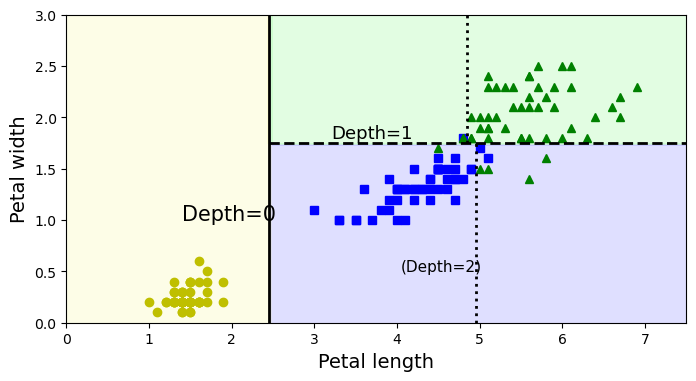

In [8]:

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Class probabilities

In [11]:
tree_clf.predict_proba([[5,1.5]])
# PRobabilities of each class

array([[0.        , 0.90740741, 0.09259259]])

In [12]:
tree_clf.predict([[5,1.5]])

array([1])

In [15]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [17]:
# I will create a dot file of the tree created and transform
export_graphviz(
    regressor,
    out_file = 'regressor.dot',
    feature_names= iris.feature_names[:2],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)


In [18]:
with open('regressor.dot') as f:
    dot_reg = f.read()
    
graph = graphviz.Source(dot_reg)
graph.format = 'png'
graph.render ('regressor')

'regressor.png'

# Moon dataset tree

In [30]:
X,y = make_moons(n_samples = 10000,noise = 0.4)
print(X.shape)

(10000, 2)


In [33]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

In [36]:
#tree_class = DecisionTreeClassifier(max_depth = 5)
#tree_class.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [38]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [41]:
grid_search=GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=42),
    param_grid = {'max_leaf_nodes': [5,10,20,50,100,None]},
    cv=5,
    scoring = 'accuracy'
)

In [42]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [5, 10, 20, 50, 100, None]},
             scoring='accuracy')

In [44]:
# So the best hyperparameter is max_leaf_nodes = 20
print("Best max_leaf nodes:" ,grid_search.best_params_['max_leaf_nodes'])

Best max_leaf nodes: 20


In [48]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006643,0.001946,0.000468,0.000202,5,{'max_leaf_nodes': 5},0.850625,0.860625,0.841250,0.853750,0.85125,0.851500,0.006232,3
1,0.005466,0.000400,0.000325,0.000066,10,{'max_leaf_nodes': 10},0.857500,0.861875,0.836250,0.853750,0.84750,0.851375,0.008913,4
2,0.005306,0.000088,0.000269,0.000006,20,{'max_leaf_nodes': 20},0.861250,0.856250,0.836875,0.868750,0.85125,0.854875,0.010698,1
3,0.006376,0.000190,0.000313,0.000042,50,{'max_leaf_nodes': 50},0.860000,0.858750,0.835625,0.867500,0.84500,0.853375,0.011467,2
4,0.006736,0.000136,0.000263,0.000001,100,{'max_leaf_nodes': 100},0.850000,0.852500,0.828125,0.865000,0.83625,0.846375,0.012908,5
5,0.010422,0.000310,0.000352,0.000034,None,{'max_leaf_nodes': None},0.803750,0.804375,0.803125,0.806875,0.78625,0.800875,0.007423,6


In [46]:
# So finally we can use the tree created(already trained) with best estimator
best_tree = grid_search.best_estimator_

In [47]:
# Evaluate

test_accuracy = best_tree.score(X_test,y_test)
print("Test set accuracy ", test_accuracy)

Test set accuracy  0.856


# Grow a forest

In [53]:
# Generate 1000 subsets of training set 
# Each having 100 instances of selected randomly (100 random indices)
ss= ShuffleSplit(n_splits = 1000, train_size = 100,test_size =None,random_state=42)

subset_x=[]
subset_y=[]


# Split goes to Train index and Test index , _ -> Test

for train_index, _ in ss.split(X_train):
    X_subset = X_train[train_index]
    y_subset= y_train[train_index]
    subset_x.append(X_subset)
    subset_y.append(y_subset)
    

# Number of subsets
print(f"Number of subsets: {len(subset_x)}")
print(f'Size of first subset: {subset_x[0].shape}')

Number of subsets: 1000
Size of first subset: (100, 2)


## train one decision tree on each subset

In [55]:
# List of scores for the 1000 trees
scores = []

# Train the 1000 trees
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']

for X_sub,y_sub in zip(subset_x,subset_y):
    little_tree = DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes, random_state=42)
    little_tree.fit(X_sub,y_sub)           # first train the tree
    score=little_tree.score(X_test,y_test) # Test on our test set
    scores.append(score)
    
    
# Average accuracy for 1000 tree

print(f"The average accuracy will be {sum(scores)/len(scores)}")



The average accuracy will be 0.790141


## For each test set , generate predictions of 1000 decision trees !!! . then keep only most freq preditions 

this gives me majority vote predictions